**Домашнее задание к лекции «Корреляция и корреляционный анализ»**

Возьмите датасет Mortality and Water Hardness**
www.kaggle.com...r-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

**Задание 1**

**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**

Построить точечный график

Рассчитать коэффициенты корреляции Пирсона и Спирмена

Построить модель линейной регрессии

Рассчитать коэффициент детерминации

Вывести график остатков

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
water_df = pd.read_csv('water.csv')
water_df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
# Данных немного - 61 строка
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


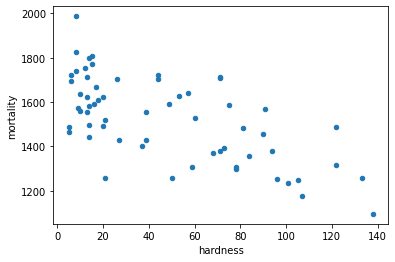

In [ ]:
# Точечный график связи жесткости воды и смертности:
water_df.plot(kind='scatter', x='hardness', y='mortality')

**Судя по точечной диаграмме, между жесткостью воды и смертностью есть слабая обратная связь: чем больше жесткость, тем меньше смертность.**

In [ ]:
# Коэффициент корреляции Пирсона:
water_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# Коэффициент корреляции Спирмана:
water_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


**Вывод: есть слабая обратная связь.**

In [ ]:
# Построим модель линейной регрессии.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = water_df[['hardness']]
y = water_df['mortality']

In [ ]:
# Разбиение на тестовую и тренинговую часть: данных немного, поэтому на тестовую часть отведем 15%:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# коэффициенты а и b в уравнении y = ax + b:
print(f'Коэффициент a: {model.coef_}, коэффициент b: {model.intercept_}')

Коэффициент a: [-3.28204413], коэффициент b: 1681.6276209577732


In [ ]:
# Прогноз:
y_pred = model.predict(x_test)
y_pred

array([1337.01298764, 1648.80717969, 1635.67900318, 1537.21767938,
       1425.62817906, 1615.98673842, 1245.11575209, 1435.47431145,
       1612.70469429, 1661.9353562 ])

In [ ]:
# Коэффициент детерминации
model.score(x_test, y_test)

0.583655258547394

Коэффициент детерминации немного больше 0,5, значит, с моделью можно работать, но она не очень хорошо объясняет связь между данными (возможно, по причине небольшого количества данных).

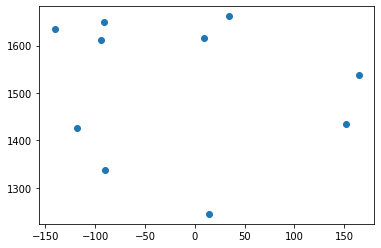

In [ ]:
# Точечный график остатков:
plt.scatter(y_test-y_pred, y_pred)

(array([2., 3., 0., 0., 1., 2., 0., 0., 0., 2.]),
 array([-140.67900318, -110.1328708 ,  -79.58673842,  -49.04060604,
         -18.49447366,   12.05165872,   42.5977911 ,   73.14392348,
         103.69005586,  134.23618824,  164.78232062]),
 <a list of 10 Patch objects>)

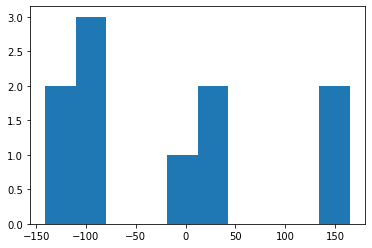

In [ ]:
# Гистограмма остатков:
plt.hist(y_test - y_pred)

Судя по графикам, остатки довольно хаотичны, что говорит о том, что модель можно использовать (при этом отрицательные значения остатков по модулю больше и распределены они ненормально, но это можно объяснить малым объемом данных).

**Задание 2**

**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

Разделить данные на 2 группы

Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
# Разделение исходных данных на 2 группы: южных городов (south_df) И северных (north_df):
south_df = water_df[water_df.location == 'South']
south_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


In [ ]:
north_df = water_df[water_df.location == 'North']
north_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


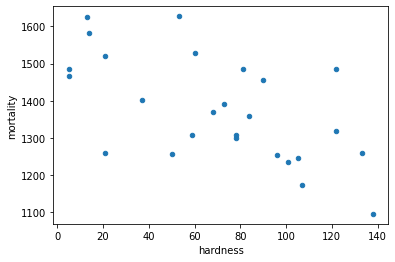

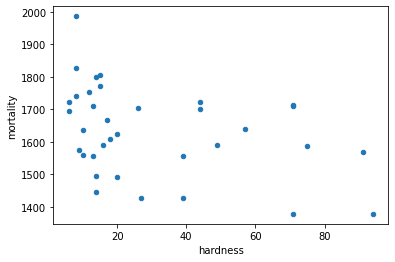

In [ ]:
# Точечные графики:
south_df.plot(kind='scatter', x='hardness', y='mortality')
north_df.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
# считаем коэф. корреляции Пирсона для группы южных городов:
south_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# считаем коэф. корреляции Пирсона для группы северных городов:
north_df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# Коэффициент корреляции Спирмана для группы южных городов:
south_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# Коэффициент корреляции Спирмана для группы северных городов:
north_df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


Судя по точечным диаграммам и значениям коэффициентов корреляции, для южных городов имеется слабая обратная связь между жесткостью воды и смертностью. Для северных городов она значительно слабее.

**Построение модели линейной регрессии для группы южных городов:**

In [ ]:
x_s = south_df[['hardness']]
y_s = south_df['mortality']

In [ ]:
# Разбиение на тестовую и тренинговую часть:
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y_s, test_size=0.30, random_state=42)

In [ ]:
model_south = LinearRegression()
model_south.fit(x_s_train, y_s_train)

LinearRegression()

In [ ]:
print(f'Коэффициент a: {model_south.coef_}, коэффициент b: {model_south.intercept_}')

Коэффициент a: [-3.51342921], коэффициент b: 1640.2204603423374


In [ ]:
# Прогноз:
y_s_pred = model_south.predict(x_s_test)
y_s_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [ ]:
y_s_test

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
2     1466
Name: mortality, dtype: int64

In [ ]:
# Коэффициент детерминации
model_south.score(x_s_test, y_s_test)

-2.5519223012352077

Коэффициент детерминации отрицательный: думаю, по причине очень малого количества данных, но возможно, что связь нелинейна.

**Построение модели линейной регрессии для группы **северных городов:**

In [ ]:
x_n = north_df[['hardness']]
y_n = north_df['mortality']

In [ ]:
# Разбиение на тестовую и тренинговую часть:
x_n_train, x_n_test, y_n_train, y_n_test = train_test_split(x_n, y_n, test_size=0.30, random_state=42)

In [ ]:
model_north = LinearRegression()
model_north.fit(x_n_train, y_n_train)

LinearRegression()

In [ ]:
print(f'Коэффициент a: {model_north.coef_}, коэффициент b: {model_north.intercept_}')

Коэффициент a: [-1.97686226], коэффициент b: 1688.150229031281


In [ ]:
# Прогноз:
y_n_pred = model_north.predict(x_n_test)
y_n_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [ ]:
# Коэффициент детерминации
model_north.score(x_n_test, y_n_test)

0.018885304285745863

Данных очень мало, модель плохо объясняет зависимость между переменными.

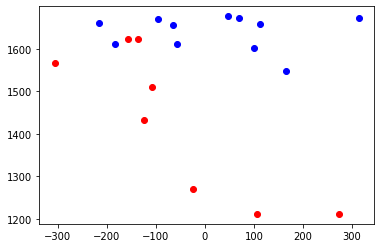

In [ ]:
# Точечные графики остатков: синим цветом показаны для северных городов, крсным - для южных.
plt.scatter(y_n_test-y_n_pred, y_n_pred, c='b')
plt.scatter(y_s_test-y_s_pred, y_s_pred, c='r')

**Точки разбросаны не хаотично. Для южных и северных городов по отдельности данная модель при имеющемся количестве данных не подходит, поэтому оснований для однозначных выводов о том, что для северных и южных городов по отдельности сохраняется слабая обратная зависимость сметрности от жесткости воды, нет.**